In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('SoSampleTest.xlsx')

In [3]:
print(df)

    Week Start     Bookings
0   2021-08-01   129.808103
1   2021-08-08   122.962071
2   2021-08-15   153.664518
3   2021-08-22   234.772937
4   2021-08-29   214.594944
..         ...          ...
126 2023-12-31    86.172820
127 2024-01-07   191.243189
128 2024-01-14   228.979605
129 2024-01-21  1085.917765
130 2024-01-28   126.711120

[131 rows x 2 columns]


In [4]:
df.head()

,Week Start,Bookings
0,2021-08-01,129.808103
1,2021-08-08,122.962071
2,2021-08-15,153.664518
3,2021-08-22,234.772937
4,2021-08-29,214.594944


In [5]:
df.set_index('Week Start',inplace=True)

In [8]:
df.head()

,Bookings
Week Start,
2021-08-01,129.808103
2021-08-08,122.962071
2021-08-15,153.664518
2021-08-22,234.772937
2021-08-29,214.594944


In [9]:
df.describe()

,Bookings
count,131.000000
mean,288.372461
std,261.808817
min,72.686246
25%,160.023637
50%,209.594394
75%,289.028204
max,1782.905032


<Axes: xlabel='Week Start'>

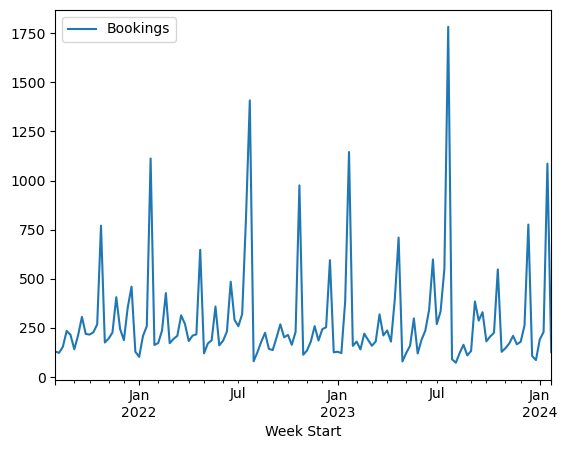

In [10]:
#Step 2. Visualize the Data
df.plot()

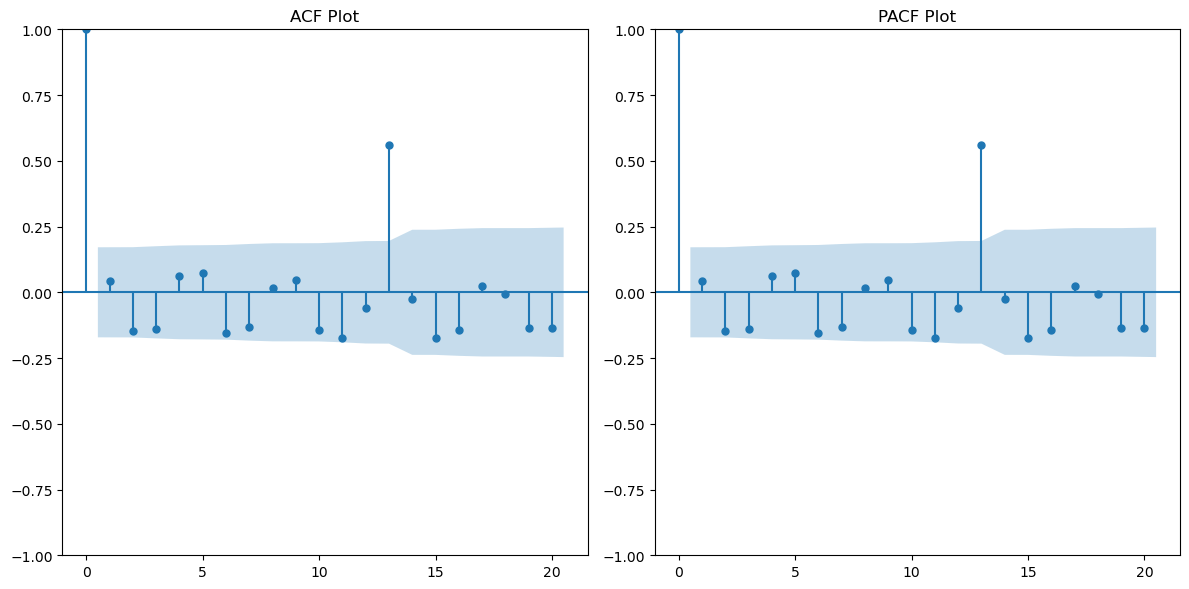

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [12]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [13]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [14]:
adfuller_test(df['Bookings'])

ADF Test Statistic:-3.1663425473241937
p-value:0.022017452406426583
#Lags Used:13
Number of Observations Used:117
Strong evidence against null hypo


In [15]:
### For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Bookings'],order=(1,0,1),seasonal_order=(1,0,1,13))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [16]:
results=model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11401D+00    |proj g|=  5.76713D-01

At iterate    5    f=  6.86129D+00    |proj g|=  3.47227D-02

At iterate   10    f=  6.84863D+00    |proj g|=  2.23190D-03

At iterate   15    f=  6.80518D+00    |proj g|=  5.15921D-02

At iterate   20    f=  6.56560D+00    |proj g|=  5.86506D-03

At iterate   25    f=  6.55929D+00    |proj g|=  1.22756D-03

At iterate   30    f=  6.53331D+00    |proj g|=  5.56685D-02

At iterate   35    f=  6.52581D+00    |proj g|=  1.09935D-03

At iterate   40    f=  6.52581D+00    |proj g|=  3.31620D-04

At iterate   45    f=  6.52578D+00    |proj g|=  3.51292D-03

At iterate   50    f=  6.52515D+00    |proj g|=  4.93716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Week Start'>

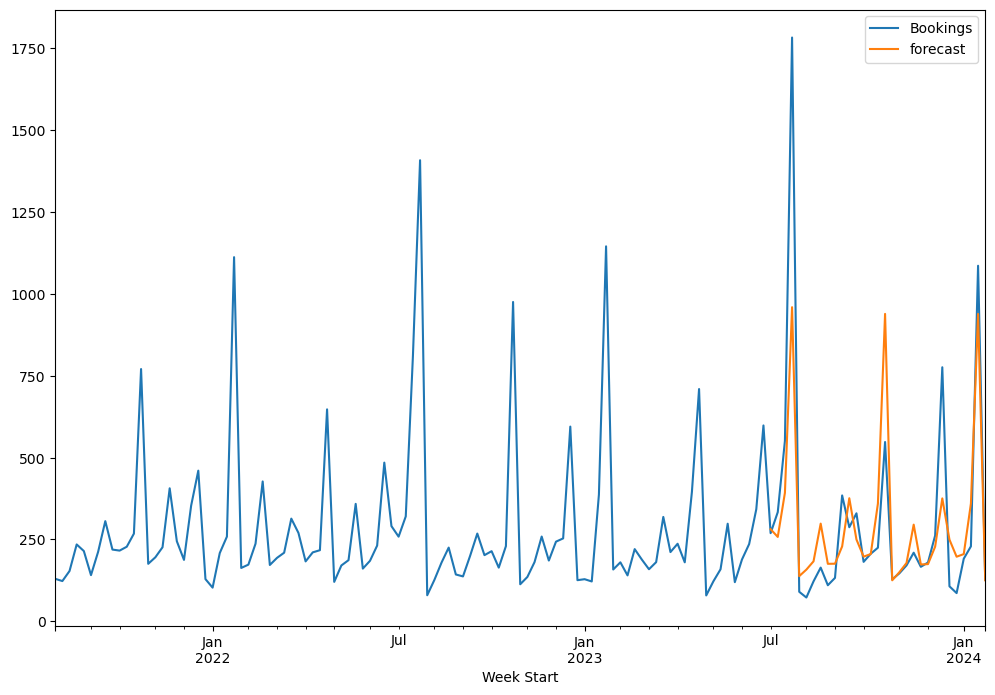

In [18]:
df['forecast']=results.predict(start=100, end = 130, dynamic=True) # testing the model performance with sample input
df[['Bookings','forecast']].plot(figsize=(12,8))

In [19]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,26)] # Creating future weeks- 26 weeks placeholder

In [20]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [26]:
future_dataset_df.head()

,Bookings,forecast
Week Start,,
2024-02-04,0.0,NaN
2024-02-11,0.0,NaN
2024-02-18,0.0,NaN
2024-02-25,0.0,NaN
2024-03-03,0.0,NaN


In [27]:
future_df=pd.concat([df,future_dataset_df])

/var/folders/qg/9qnm2g51701gxcxzzwr1q97c0000gn/T/ipykernel_81797/674726799.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dataset_df])


<Axes: xlabel='Week Start'>

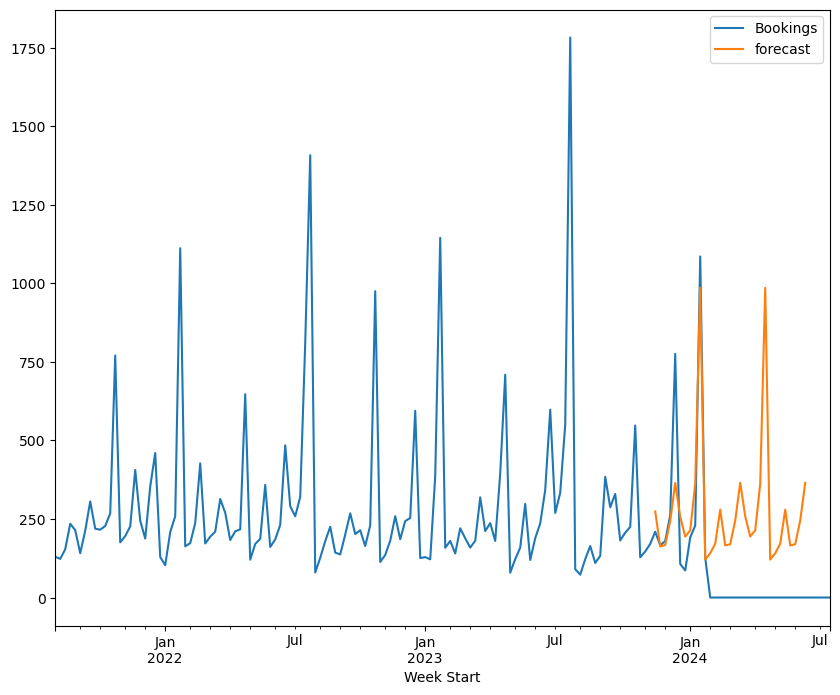

In [28]:
future_df['forecast']=results.predict(start=120, end=150, dynamic=True)
future_df[['Bookings','forecast']].plot(figsize=(10,8))

In [29]:
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the bookings for the last weeks
print(future_df1)

               Bookings    forecast
Week Start                         
2023-11-19   209.594394  273.907142
2023-11-26   166.480645  162.376107
2023-12-03   179.642179  167.371652
2023-12-10   262.158393  243.786008
2023-12-17   775.903533  364.562071
2023-12-24   106.904772  257.890199
2023-12-31    86.172820  193.886442
2024-01-07   191.243189  213.619520
2024-01-14   228.979605  362.105048
2024-01-21  1085.917765  986.135702
2024-01-28   126.711120  120.686342
2024-02-04     0.000000  141.050861
2024-02-11     0.000000  171.329668
2024-02-18     0.000000  279.661104
2024-02-25     0.000000  165.966778
2024-03-03     0.000000  169.603131
2024-03-10     0.000000  245.160092
2024-03-17     0.000000  365.391827
2024-03-24     0.000000  258.403900
2024-03-31     0.000000  194.202646
2024-04-07     0.000000  213.804807
2024-04-14     0.000000  362.191066
2024-04-21     0.000000  986.091121
2024-04-28     0.000000  120.722434
2024-05-05     0.000000  141.064879
2024-05-12     0.000000  171

In [30]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1.to_excel('output_up.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...
